# 06. 차원 축소

## 01. 차원 축소(Dimension Reduction) 개요 
- 차원축소 알고리즘
  1. PCA
  2. LDA
  3. SVD
  4. NMF
- 차원축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
  * 차원이 증가할수록 희소한 구조  
    -> 수 백개 이상의 피처로 구성된 데이터는 적은 차원에서 학습된 모델보다 예측 신뢰도 저하  
    -> 피처 많을 경우 개별 피처간 상관관계가 높을 가능성 큼 - 다중 공선성 문제
  => 차원 축소: 더 직관적으로 데이터 해석가능
    1. 피처 선택(feature selection): 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거, 데이터 특징 잘 나타내는 주요 피처만 선택  
    2. 피처 추출(feature extraction): 기본 피처를 저차원의 중요 피처로 압축해서 추출 -> 기존의 피처와 완전 다른 값  
       -> 피처를 함축적으로 더 잘 설명할 수 있는 다른 공간으로 매핑해서 추출 -> 기존에 인지하기 어려웠던 잠재적 요소 추출  
    => 차원 축소를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 찾는 것이 더 중요  -> 이를 찾는 알고리즘: 차원 축소 알고리즘  
- 주요 사용 영역
  - 이미지 변환과 압축
  - 텍스트 문서의 숨겨진 의미 추출: 시맨틱 토픽 -> SVD, NMF

## 02. PCA(Principal Component Analysis)
#### PCA 개요: 가장 대표적인 차원 축소 기법 
: 여러 변수간에 존재하는 상관관계를 이용하여 이를 대표하는 주성분 추출 -> 차원 축소
- 기존 데이터의정보 유실이 최소화됨 
- 가장 높은 분산을 가지는 데이터 축을 찾아 이 축으로 차원 축소 -> 축: PCA의 주성분   
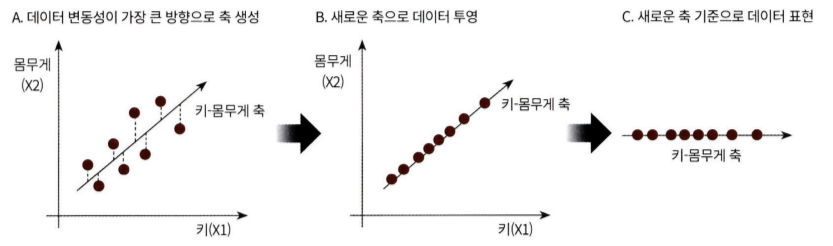  
-> 가장 큰 데이터 변동성을 기반으로 첫번째 벡터 축 생성, 이 축에 직각이 되는 벡터를 두번째 축, 세번째 축은 두번째 축과 직각이 되는 벡터  
-> 생성된 벡터 축에 원본 데이터 투영 -> 벡터 축의 개수만큼의 차원으로 원본 데이터 차원 축소  
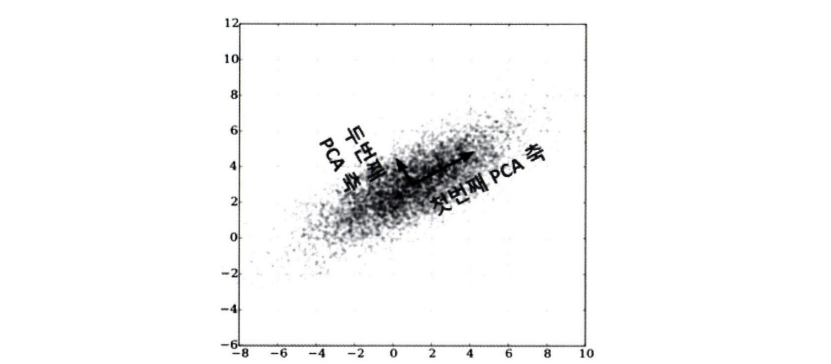  
=> PCA(주성분 분석): 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성 대부분 설명 가능  
$ C = P \sum P^T $   C: 공분산 행렬  P: nxn 정방행렬,  
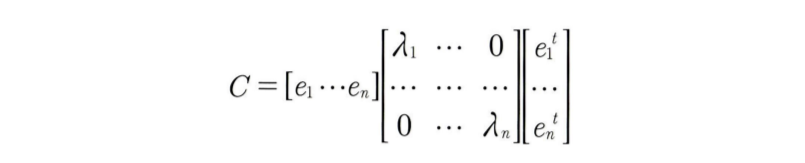  
=> 입력데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식  
=> PCA
- 수행 순서
  1. 입력 데이터 세트의 공분산 행렬 생성
  2. 공분산 행렬의 고유벡터와 고유값 계산
  3. 고유값이 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터 추출
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환 

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


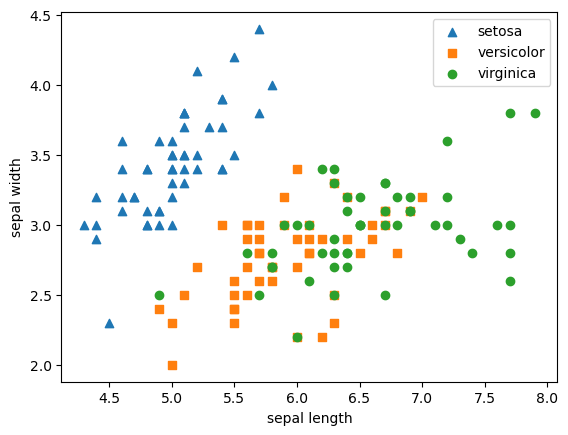

In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현 
markers=['^', 's','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- PCA: 4개 속성 -> 2개로 압축 -> 2개의 PCA 속성으로 붓꽃 데이터 품종 분포 시각화(2차원)

In [4]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [6]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


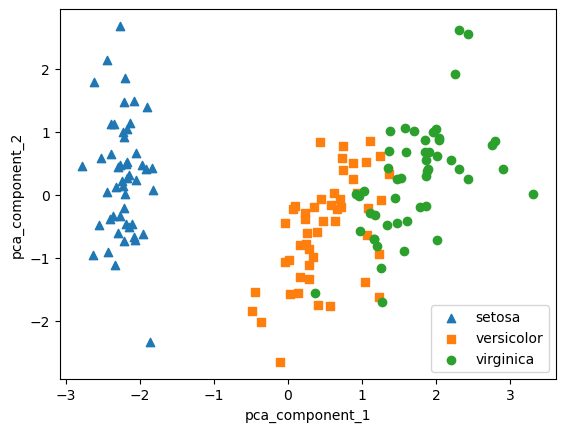

In [7]:
# setosa를 세모, versicolor 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공 : explained_variance_ratio_

In [8]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 원본 데이터와 PCA로 변환된 데이터 세트에 각각 분류 적용 후 결과 비교 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


-> 원본 데이터의 특성을 상당 부분 유지하고 있음

In [10]:
df = pd.read_excel('./data/credit_card.xls', header=1, sheet_name = 'Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [11]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace = True)
y_target = df['default']
X_features = df.drop('default', axis=1)

- heatmap으로 시각화

<Axes: >

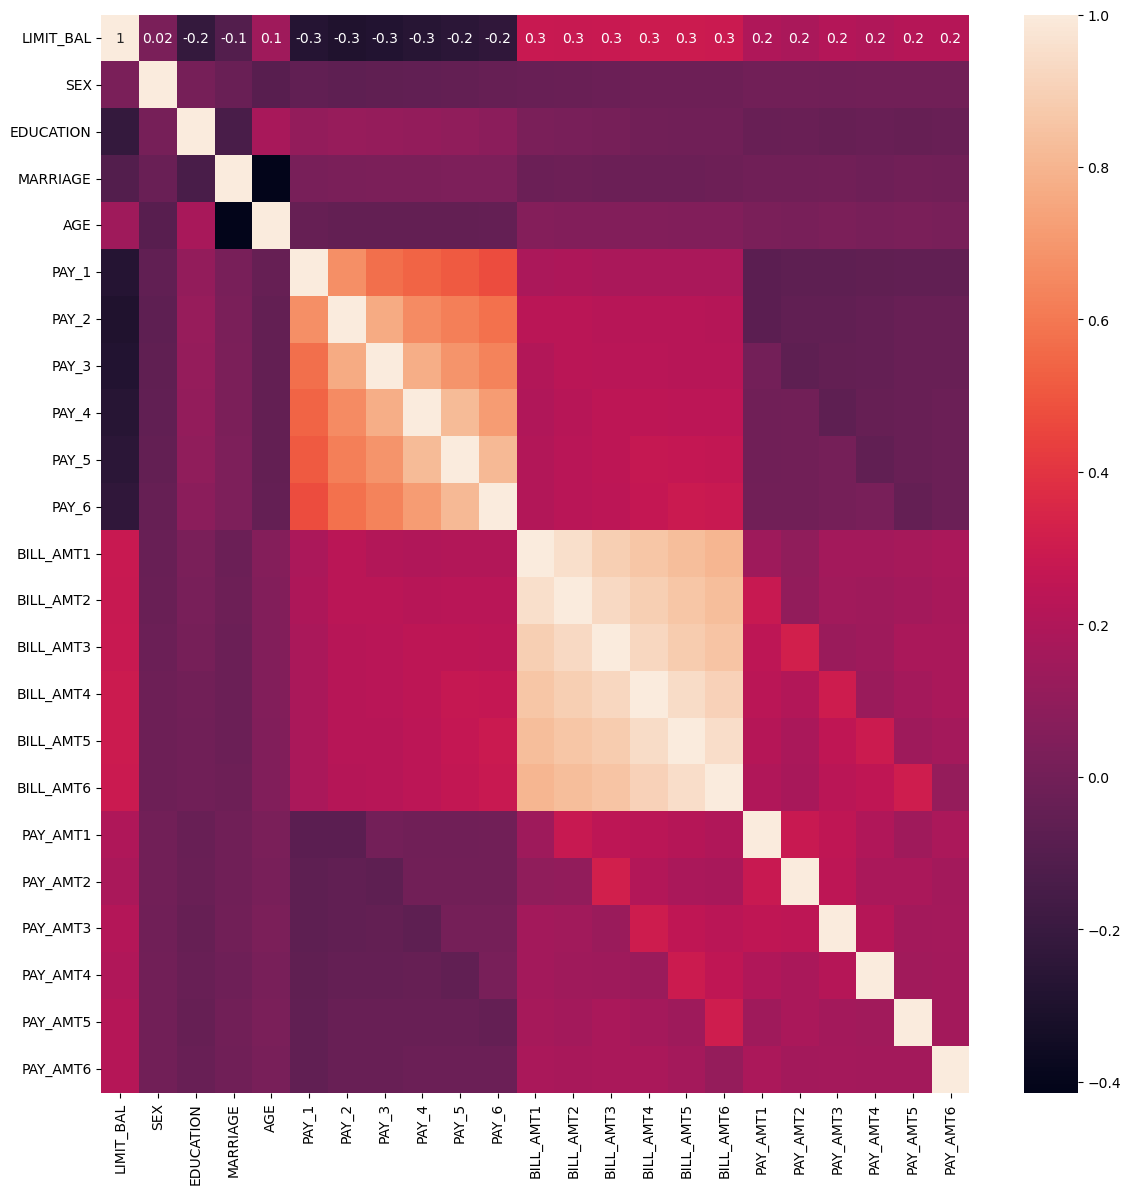

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

-> BILL_AMT1 ~ BILL_AMT6 6개의 속성끼리 대부분 상관도가 0.9 이상으로 매우 높음   
-> PAY_1 ~ PAY_6 까지의 속성 상관도 역시 높은 편 

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


-> 단 두개의 PCA component만으로도 6개 속성의 변동성을 약 95%이상 설명 가능 

- 원본 데이터 세트에 랜덤포레스트 적용 

In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


- 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해 동일한 분류 예측 적용

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7936 0.7962 0.8005]
PCA 변환 데이터 세트 평균 정확도:0.7968


## 03. LDA(Linear Discriminant Analysis)
#### LDA 개요 
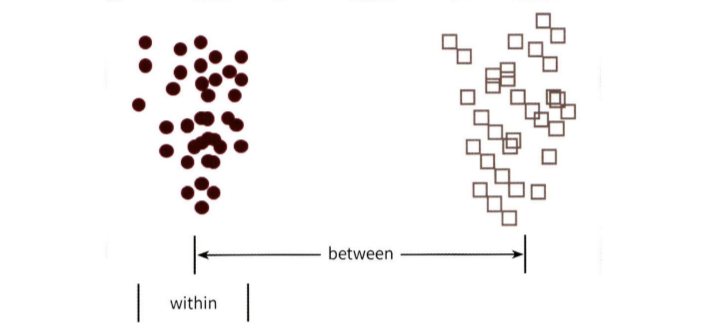  
- LDA 구하는 스텝
  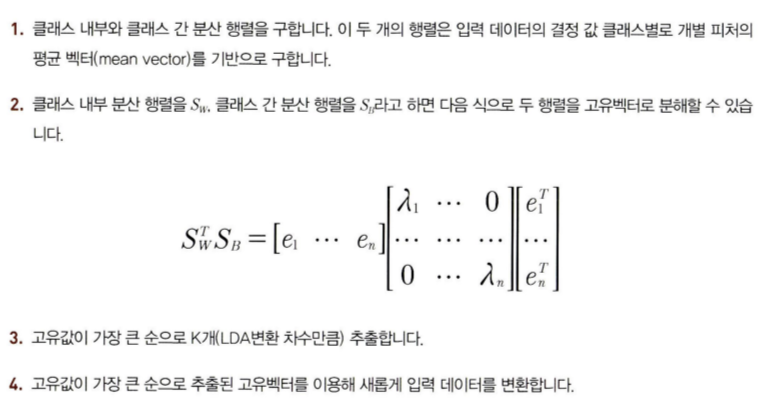

#### 붓꽃 데이터 세트에 LDA 적용하기 

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [18]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


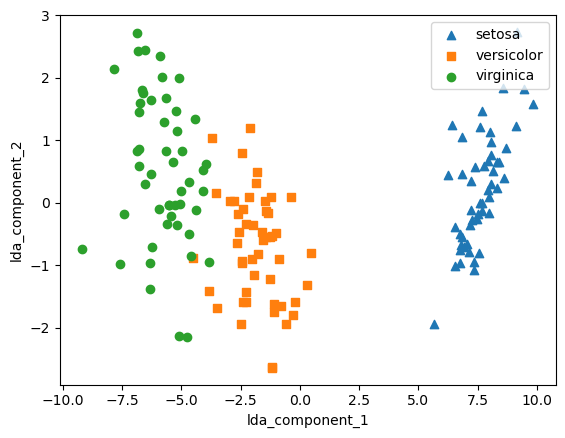

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target']=iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's','o']

# setosa의 targeet 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시 
for i, marker in enumerate(markers):
    x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()